Explained Variance Ratio:
[0.72962445 0.22850762 0.03668922 0.00517871]


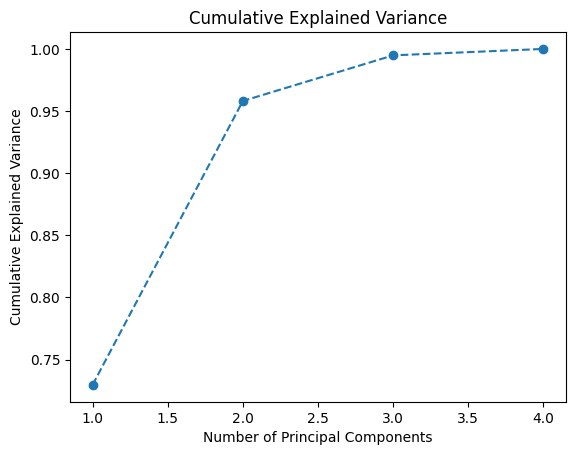

DataFrame with Selected Principal Components:
        PC1       PC2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data =pd.read_csv("iris.csv")

# Extract features and labels
features = data.iloc[:, :-1]
labels = data.iloc[:, -1]

# Standardize the features (important for PCA)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_standardized)

# Create a DataFrame with the principal components and labels
columns = [f"PC{i}" for i in range(1, len(features.columns) + 1)]
pc_df = pd.DataFrame(data=principal_components, columns=columns)
pc_df["species"] = labels

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components based on the plot or a desired threshold
# For example, if 95% of the variance is explained, you may choose the number of components accordingly

# Select a specific number of components
n_components = 2  # Replace with your desired number of components

# Retain the selected number of principal components
selected_components = pc_df.iloc[:, :n_components]

# Display the resulting DataFrame with the selected components and labels
print("DataFrame with Selected Principal Components:")
print(selected_components.head())
